# Comcast Telecom Consumer Complaints

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import data into Python environment.
comcast_data = pd.read_csv('Comcast_telecom_complaints_data.csv')
comcast_data

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No


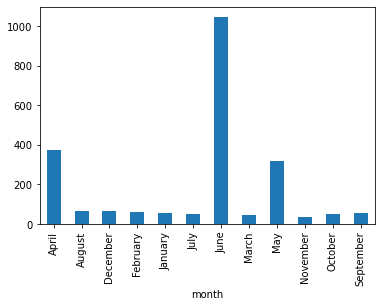

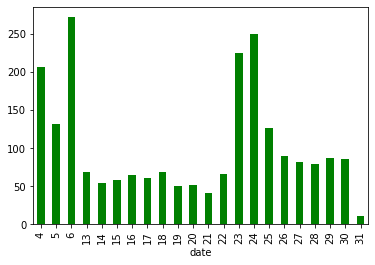

In [3]:
# Provide the trend chart for the number of complaints at monthly and daily granularity levels.

comcast_data['month'] = pd.to_datetime(comcast_data['Date_month_year']).dt.month_name()
comcast_data['date'] = pd.to_datetime(comcast_data['Date_month_year']).dt.day
                                      
comcast_data.groupby(['month'])['Customer Complaint'].count().plot(kind = 'bar')
plt.show()
comcast_data.groupby(['date'])['Customer Complaint'].count().plot(kind = 'bar', color = 'green')
plt.show()
                                      
                                      
                        

In [3]:
# Provide a table with the frequency of complaint types.

frequency_of_complaint_types = comcast_data['Customer Complaint'].str.lower().value_counts().to_frame().reset_index()
frequency_of_complaint_types

,index,Customer Complaint
0,comcast,102
1,comcast data cap,30
2,comcast internet,29
3,comcast data caps,21
4,comcast billing,18
...,...,...
1735,monthly data caps,1
1736,"comcast/xfinity poor service, fraudulent billi...",1
1737,lost emails/billing,1
1738,improper billing and non resolution of issues,1


In [5]:
# Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

frequency_of_complaint_types.head()

,index,Customer Complaint
0,comcast,102
1,comcast data cap,30
2,comcast internet,29
3,comcast data caps,21
4,comcast billing,18


In [6]:
# - Create a new categorical variable with value as Open and Closed.
#Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

comcast_data['Status'] = comcast_data['Status'].apply(lambda x: 'Open' if ((x =='Open') | (x =='Pending')) else 'closed')
comcast_data

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month,date
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,closed,No,April,22
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,closed,No,August,4
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,closed,Yes,April,18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,July,5
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,closed,No,May,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,213550,Service Availability,04-02-15,04-Feb-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,closed,No,February,4
2220,318775,Comcast Monthly Billing for Returned Modem,06-02-15,06-Feb-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,closed,No,February,6
2221,331188,complaint about comcast,06-09-15,06-Sep-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,closed,No,September,6
2222,360489,Extremely unsatisfied Comcast customer,23-06-15,23-Jun-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,closed,No,June,23


'open'

,State,Status
0,Alabama,9
1,Arizona,6


'close'

,State,Status
0,Alabama,17
1,Arizona,14


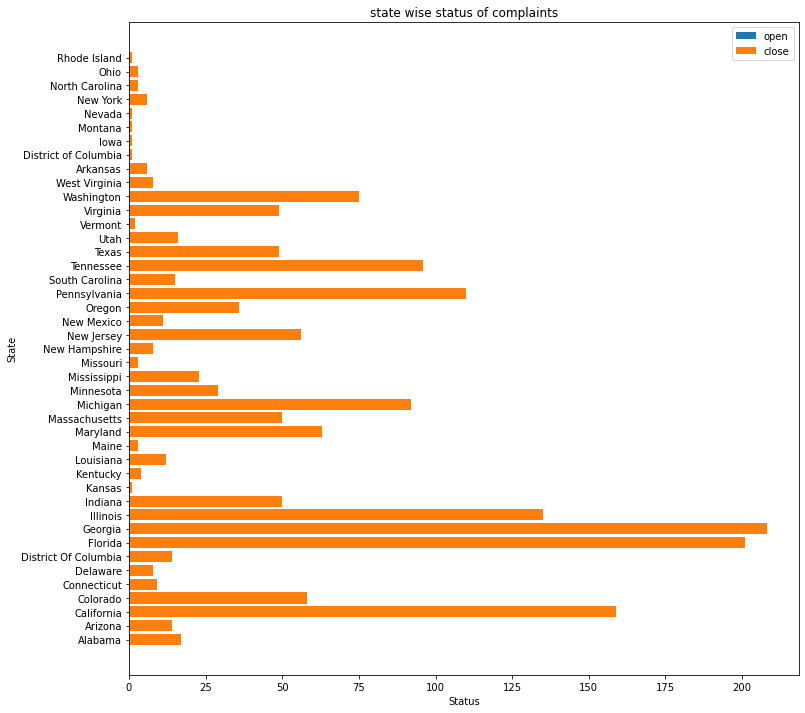

In [18]:
# - Provide state wise status of complaints in a stacked bar chart

op = comcast_data[comcast_data['Status']=='Open'].groupby(['State'])['Status'].count().to_frame().reset_index()
cl = comcast_data[comcast_data['Status']=='closed'].groupby(['State'])['Status'].count().to_frame().reset_index()
display('open',op.head(2))
display('close',cl.head(2))

fig = plt.figure(figsize = (12,12))
plt.barh(op['State'], op['Status'])
plt.barh(cl['State'], cl['Status'])
plt.legend(["open", "close"])
plt.title("state wise status of complaints")
plt.xlabel("Status")
plt.ylabel("State", size = 10)
plt.show()

In [51]:
# Which state has the maximum complaints 
df = comcast_data.groupby(['State'])['Status'].count().to_frame().sort_values('Status',ascending = False)
df.head()

,Status
State,
Georgia,288
Florida,240
California,220
Illinois,164
Tennessee,143


In [26]:
# Which state has the maximum complaints 
'Georgia'

'Georgia'

In [54]:
# Which state has the highest percentage of unresolved complaints

unresolved = df.merge(op, on = 'State')
unresolved['percentile'] = (unresolved['Status_y']/unresolved['Status_x'])*100
unresolved.sort_values('percentile', ascending = False).reset_index().head()



,index,State,Status_x,Status_y,percentile
0,33,Kansas,2,1,50.000000
1,29,Kentucky,7,3,42.857143
2,16,Mississippi,39,16,41.025641
3,30,Maine,5,2,40.000000
4,18,Alabama,26,9,34.615385


In [56]:
# Which state has the highest percentage of unresolved complaints
"Kansas"

'Kansas'

In [64]:
# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

resolved = comcast_data[comcast_data['Status']=='closed'][['Received Via']].value_counts(normalize = True)*100
resolved 

Received Via      
Customer Care Call    50.615114
Internet              49.384886
dtype: float64